In [2]:
module Spread
export C_init, spread_row

function C_init(N2::Int64)
    C = zeros(Float64, N2, 2)
    C[1,1] = 1/2
    C[2,1] = 1/2
    C[N2-1,2] = 1/2
    C[N2,2] = 1/2
    
    return C
end

function spread_row(M::Matrix{Float64}, row_index::Int64)
    M_cp = zeros(Float64, size(M)... )
    if row_index == 1
        mother = M[1,1] * M[1,2] >0 ? sqrt(6) : 2

        M_cp[1,1] = 1/mother * M[1,1]
        M_cp[2,1] = 1/mother * M[1,1]
        M_cp[1,2] = 1/mother * M[1,2]
        M_cp[2,2] = 1/mother * M[1,2]
    elseif row_index == size(M, 1)
        mother = M[end,1] * M[end,2] >0 ? 1/sqrt(6) : 1/2

        M_cp[end,1] = mother * M[end,1]
        M_cp[end-1,1] = mother * M[end,1]
        M_cp[end,2] = mother * M[end,2]
        M_cp[end-1,2] = mother * M[end,2]
    else
        M_cp[row_index, 1] = 1/2 * M[row_index, 1]
        M_cp[row_index+1, 1] = 1/4 * M[row_index, 1]
        M_cp[row_index-1, 1] = 1/4 * M[row_index, 1]

        M_cp[row_index, 2] = 1/2 * M[row_index, 2]
        M_cp[row_index+1, 2] = 1/4 * M[row_index, 2]
        M_cp[row_index-1, 2] = 1/4 * M[row_index, 2]
    end

    return M_cp
end

function spread_block(M::Matrix{Float64}, row_index::Int64)
    M_cp = zeros(Float64, size(M)... )
    
    if row_index == 1
        M_cp[1,1] = 1/2 * M[1,1]
        M_cp[2,1] = 1/2 * M[1,1]
        M_cp[1,2] = 1/2 * M[1,2]
        M_cp[2,2] = 1/2 * M[1,2]
    end
    
end

end

Main.Spread

In [3]:
N2 = 8

C0 = Spread.C_init(N2)

# C_test = zeros(Float64, N2, 2)

# C_test[4,1] = 1
# C_test[4,2] = 1


# C_test[1,1] = 1
# C_test[1,2] = 1

C_test[N2,1] = 1
C_test[N2,2] = 1

UndefVarError: UndefVarError: `C_test` not defined

In [4]:
# rst = Spread.spread_row(C_test, 1)
rst = Spread.spread_row(C_test, N2)

UndefVarError: UndefVarError: `C_test` not defined

In [5]:
rst[1,1] * rst[1,2]

UndefVarError: UndefVarError: `rst` not defined

In [6]:
function spread(M, (i,j))
    M_cp = zeros(size(M))
    if i == j == 0
        M_cp[1,1] = 1/2 * M[1,1]
        M_cp[2,1] = 1/2 * M[1,1]
        M_cp[1,2] = 1/2 * M[1,2]
        M_cp[2,2] = 1/2 * M[1,2]

end


eta(i) = 1 - i % 2

# function  eta(i)
#     if i %2 == 0
#         return 1
#     else
#         return 0
# end

Base.Meta.ParseError: ParseError:
# Error @ c:\Users\Kaiming\OneDrive\Academic\Project\Classical shadow\Codes\try.ipynb:19:6
#         return 0
# end
#    └ ── Expected `end`

In [7]:
using Symbolics
@variables x₁ x₂ x₃ x₄

function spread(var1, var2)
    rst = oneunit(var1)
    if var1 == 1 && var2 == 1
        return 1/2


end

Base.Meta.ParseError: ParseError:
# Error @ c:\Users\Kaiming\OneDrive\Academic\Project\Classical shadow\Codes\try.ipynb:10:4

end
#  └ ── Expected `end`

In [8]:
function P1(N::Int, i::Int,t::Int)
    body = sum(1:N-1) do k
        kappa = pi*k/N
        cos( (i - 1/2) * kappa) * cos(kappa/2)^(2t+1)
    end
    return 1/N + 2/N *body
end

function PN(N::Int, i::Int,t::Int)
    body = sum(1:N-1) do k
        kappa = pi*k/N
        cos( (N-1/2)*kappa ) * cos( (i - 1/2) * kappa) * cos(kappa/2)^(2t)
    end
    return 1/N + 2/N *body
end


function  PP_full(N::Int, t::Int)
    sum(1:N) do i
        P1(N, i,t)*PN(N, i,t)
    end 
end

PP_full (generic function with 1 method)

In [9]:
N = 15
test_t = N÷2+2
println(P1(N, 1,1))
println(PN(N, N,1))

println(PP_full(N, test_t) - PP_calc4(N, test_t))

0.7499999999999999
0.7499999999999989


UndefVarError: UndefVarError: `PP_calc4` not defined

In [10]:
function PP_calc(N, t)
    body = sum(1:N) do i
        sum(1:N-1) do j
            sum(1:N-1) do k
                kappak = pi*k/N
                kappaj = pi*j/N
                cos( (i - 1/2) * kappak) * cos(kappak/2)^(2t+1) * cos( (N-1/2)*kappaj ) * cos( (i - 1/2) * kappaj) * cos(kappaj/2)^(2t)
            end
        end
    end 
    return 1/N + 4/N^2 *body
end

PP_calc (generic function with 1 method)

In [11]:
PP_full(N, test_t) - PP_calc(N, test_t)

-1.8436942646410728e-17

In [12]:
function PP_calc2(N, t)
    body = sum(1:N) do i
        sum(1:N-1) do j
            sum(1:N-1) do k
                kappak = pi*k/N
                kappaj = pi*j/N
                A = cos(kappak/2)^(2t+1) * cos(kappaj/2)^(2t)
                # B = 1/2 * (cos((-1+2i) *(kappaj-kappak) ) + cos((-1+2i) *(kappaj+kappak) ) )
                B = 1/2 * (cos((-1+2i) *(kappaj-kappak) ))
                C = cos( (N-1/2)*kappaj )
                A*B*C
            end
        end
    end 
    return 1/N + 4/N^2 *body
end

PP_calc2 (generic function with 1 method)

In [13]:
PP_full(N, test_t) - PP_calc2(N, test_t)

-3.2314730454225185e-17

In [14]:
function PP_calc3(N, t)
    body = sum(1:N-1) do k
        A = cos(k*pi/2/N)^(1 + 4 *t)
        B = cos( (k*(N-1/2)*pi) / N   )
        A*B
        end
    
    return 1/N + 2/N *body
end

PP_calc3 (generic function with 1 method)

In [15]:
PP_full(N, test_t) - PP_calc3(N, test_t)

-1.8436942646410728e-17

In [16]:
using SpecialFunctions

function c4t(N::Int, m::Int, t::Int)
    cos( pi*m/2/N)^(4t+2)
end

function B1(N::Int, p::Int)
    beta_inc(1/2+p, 1/2, cos(pi/2/N)^2)[1] * beta(1/2+p, 1/2)
end

function B2(N::Int, p::Int)
    beta_inc(1/2+p, 1/2, sin(pi/N)^2)[1] * beta(1/2+p, 1/2) 
end

function Gamma_term(p::Int)
    gamma(1/2+p) / gamma(1+p)
end

function bond_term(N::Int, t::Int)
    1/pi * (B1(N, 2t+1) + B2(N, 2t+1)) - 1/sqrt(pi) * Gamma_term(2t+1)
end


function P1(N::Int, i::Int,t::Int)
    body = sum(1:N-1) do k
        kappa = pi*k/N
        cos( (i - 1/2) * kappa) * cos(kappa/2)^(2t+1)
    end
    return 1/N + 2/N *body
end

function PN(N::Int, i::Int,t::Int)
    body = sum(1:N-1) do k
        kappa = pi*k/N
        cos( (N-1/2)*kappa ) * cos( (i - 1/2) * kappa) * cos(kappa/2)^(2t)
    end
    return 1/N + 2/N *body
end


function  PP_full(N::Int, t::Int)
    sum(1:N) do i
        P1(N, i,t)*PN(N, i,t)
    end 
end


function PP_neat(N::Int,t::Int)
    M,c = divrem(N,2)
    term1 = sum(1:M) do m
        c4t(N, 2m, t) 
    end
    term2 = sum(1:M) do m
        c4t(N, 2m-1, t) 
    end

    return 1/N + 2/N * (term1 - term2) - 2c/N * sin(pi/2/N)^(4t+2)
end



PP_neat (generic function with 1 method)

In [17]:
function L(N::Int, t::Int)
    M,c = divrem(N,2)
    return 1/N + 1/sqrt(pi) * Gamma_term(2t+1) - 1/pi * B2(N, 2t+1) - 2/N*sum(1:M) do m
        c4t(N, 2m-1, t) 
    end
end
function U(N::Int, t::Int)
    return 1/N - bond_term(N, t)
end

U (generic function with 1 method)

In [50]:
using Plots
using LaTeXStrings

N = 100
t = 20*N : 30*N

pp_neat = PP_neat.(N, t)
# pp_full = PP_full.(N, t);


1001-element Vector{Float64}:
 0.002930522179049146
 0.0029334511437513044
 0.0029363797391692174
 0.002939307963480968
 0.0029422358148689784
 0.002945163291519998
 0.0029480903916250904
 0.0029510171133796384
 0.002953943454983324
 0.00295686941464014
 ⋮
 0.005486977907793972
 0.005489124281237953
 0.005491269753669177
 0.005493414325222084
 0.0054955579960316485
 0.005497700766233384
 0.0054998426359633415
 0.005501983605358103
 0.005504123674554786

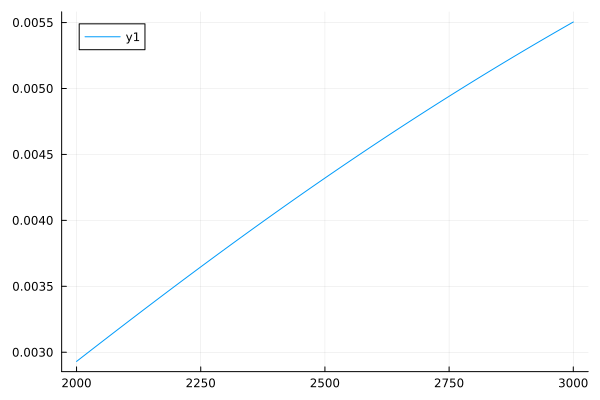

In [51]:
plot(t, pp_neat)

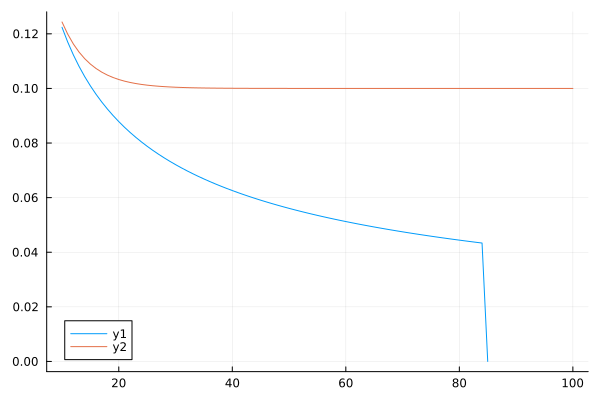

In [20]:
function f1(N, t)
    1/sqrt(pi) * Gamma_term(2t+1) - 1/pi * B2(N, 2t+1)
end

function f2(N,t)
    M,c = divrem(N-1,2)
    term1 = sum(1:M) do m
        c4t(N, 2m, t) 
    end

    return  2/N * (term1) + 1/N
end

plot(t, [f1.(N,t), f2.(N,t)])


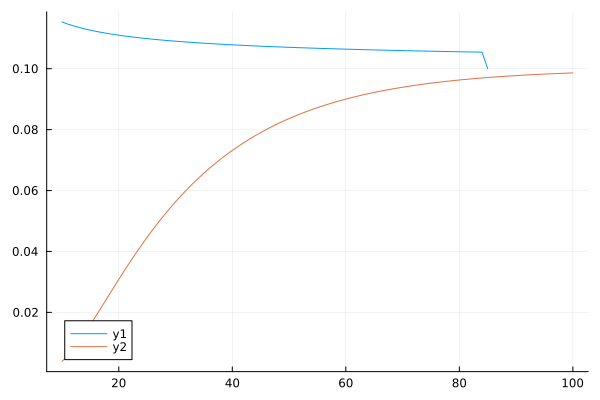

In [21]:
function bond2(N::Int, t::Int)
    1/N + sqrt(2)/2/N * Gamma_term(2t+1)
end

bond2_lst = bond2.(N, t)
plot(t, [bond2_lst, pp_neat])

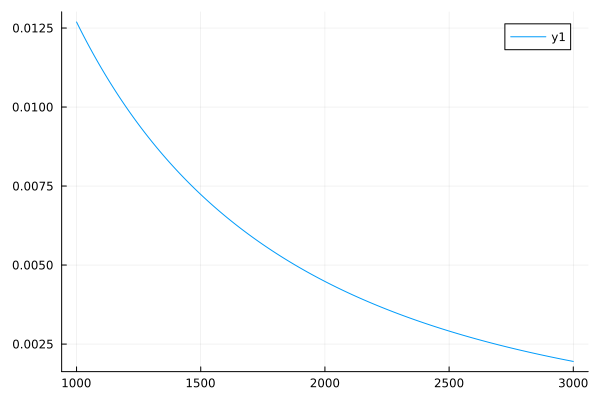

In [57]:
t = 10*N:30*N
bbb =@. B1(N,2t+1)
plot(t, bbb)



In [16]:
t = 18

x0 = atan(1/(1+4t))
cos(2x0)^(4t+2)

0.9726095465800082

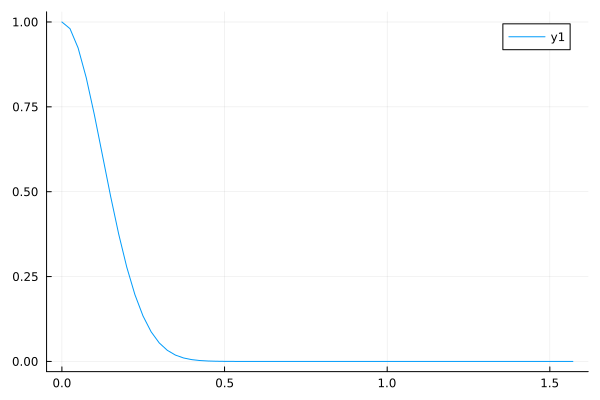

In [10]:
using Plots
x = range(0, pi/2, 64)
plot(x, cos.(x).^64 )

In [2]:

mat = [ -5//144 1//72 1//48;
1//72 -1//9 1//72;
1//48 1//72 -5//144]

free = 1//48 .* [1 2 1; 2 4 2; 1 2 1]

mat - free

3×3 Matrix{Rational{Int64}}:
 -1//18  -1//36    0
 -1//36  -7//36  -1//36
   0     -1//36  -1//18

In [3]:
sum(mat)

-1//12

In [3]:
using Caching, InteractiveUtils, Serialization

@cache function foo(x)
    x+1
end

LoadError: LoadError: UndefVarError: `@cache` not defined
in expression starting at c:\Users\Kaiming\OneDrive\Academic\Project\Classical shadow\Codes\try.ipynb:3

In [7]:
for (i,j) in [(1  , 2), (2, 3), (3, 4)]
    println(i, " ", j)
end

1 2
2 3
3 4
